In [1]:
%pip install pandas -q
%pip install scikit.learn -q
%pip install joblib -q
%pip install matplotlib -q
%pip install seaborn -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import ElasticNet, SGDRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('./diamonds.csv')
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.drop_duplicates(inplace=True)

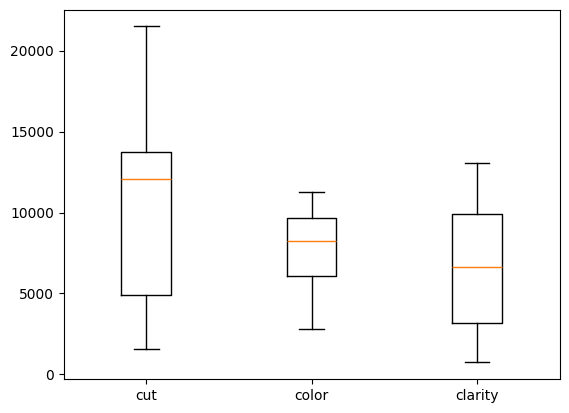

In [4]:
boxes = {
    'cut': df['cut'].value_counts(),
    'color': df['color'].value_counts(),
    'clarity': df['clarity'].value_counts()
}
plt.boxplot(boxes.values(), labels=boxes.keys())
plt.show()

In [5]:
dt = (df.dtypes == "object")
object_cols = list(dt[dt].index)

label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

column_transformer = ColumnTransformer(
    [('onehot', OneHotEncoder(), object_cols)],
    remainder='passthrough'
)


X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)
dump(column_transformer, 'encoder.pkl')

# # 0.35,"Ideal","D","VS2",62,55,829,4.47,4.53,2.79
# print(X_train.iloc[0])
# print(X_train_encoded[1])

['encoder.pkl']

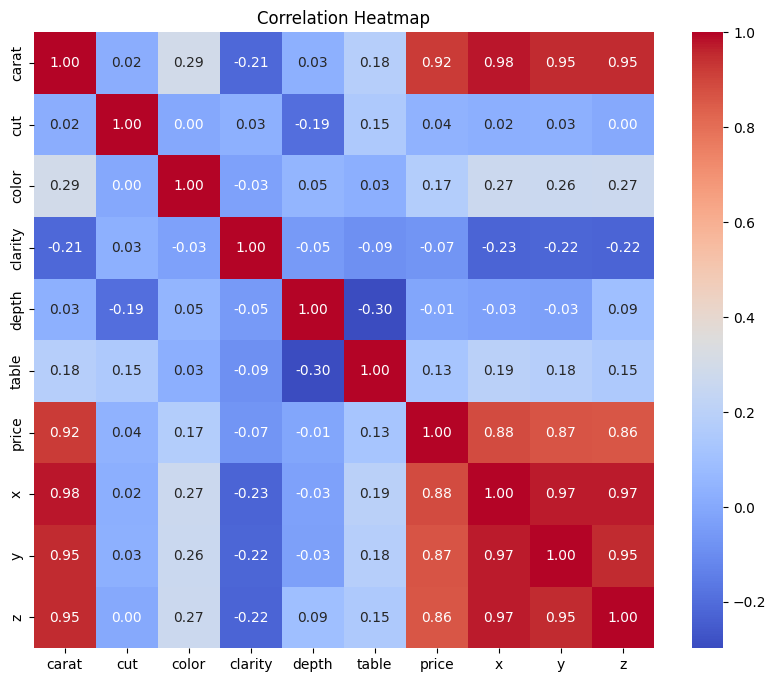

In [6]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Cross-Validation Scores: [0.97972973 0.98002667 0.98021898 0.9810533  0.97788949]
Mean CV Score: 0.9797836307856759

Training Set Metrics:
Mean Absolute Error: 101.60914216446194
Mean Squared Error: 43670.78406783832
R-squared Score: 0.9972824211689549


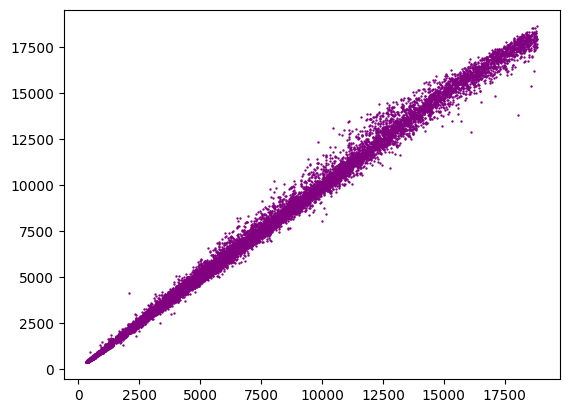


Test Set Metrics:
Mean Absolute Error: 263.6784648688363
Mean Squared Error: 273676.3466618668
R-squared Score: 0.9820446735426465


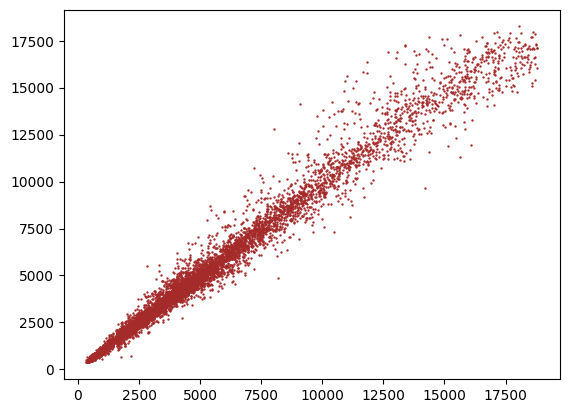

In [7]:
clf = RandomForestRegressor(n_jobs=-1, random_state=42)

scores = cv_scores = cross_val_score(clf, X_train_encoded, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

clf = RandomForestRegressor(n_jobs=-1, random_state=42)
clf.fit(X_train_encoded, y_train)
dump(clf, 'model_random_forest.pkl')

y_train_pred = clf.predict(X_train_encoded)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print("\nTraining Set Metrics:")
print("Mean Absolute Error:", train_mae)
print("Mean Squared Error:", train_mse)
print("R-squared Score:", train_r2)
plt.scatter(y_train, y_train_pred, s=0.5, c='purple')
plt.show()

y_test_pred = clf.predict(X_test_encoded)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\nTest Set Metrics:")
print("Mean Absolute Error:", test_mae)
print("Mean Squared Error:", test_mse)
print("R-squared Score:", test_r2)
plt.scatter(y_test, y_test_pred, s=0.5, c='brown')
plt.show()

[ -1.82349165  -0.61297938   0.41364447   0.73577752  -0.5732585
   0.75835554 -23.44275021 -11.89048907  -7.03333368  -5.8735802 ]
Start
Trained

Training Set Metrics:
Mean Absolute Error: 1230.7801496689403
Mean Squared Error: 3470549.9974404634
R-squared Score: 0.7840319699669981


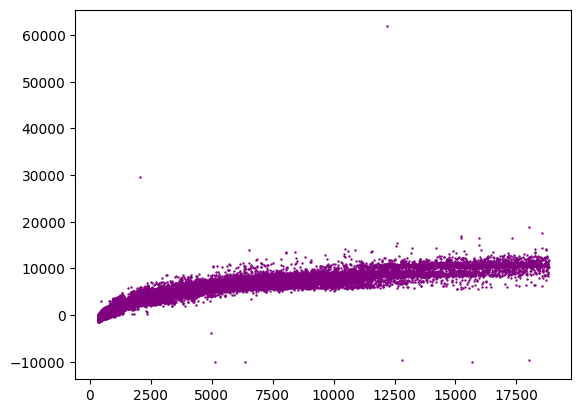


Test Set Metrics:
Mean Absolute Error: 1212.4926268393556
Mean Squared Error: 3252186.0007551815
R-squared Score: 0.7866309527445512


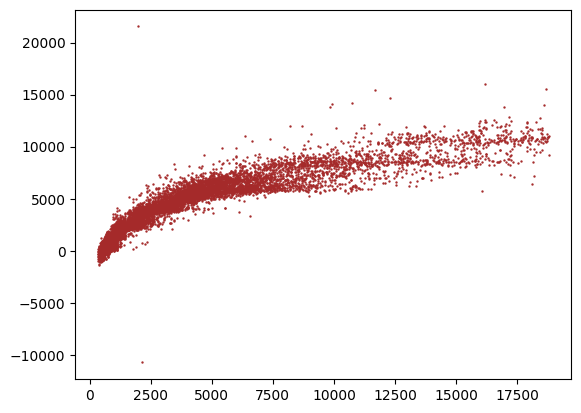

In [8]:
scores = cross_val_score(ElasticNet(), X, y, cv = 10)

print(scores)

# parameters = {
# }
regr = ElasticNet(random_state=42)
# clf = GridSearchCV(
#   regr,
#   parameters,
#   n_jobs = 4,
#   verbose=True
# )
clf = regr

print("Start")
clf.fit(X_train_encoded, y_train)
print("Trained")
# print(clf.best_params_)
# clf = clf.best_estimator_
dump(clf, 'model_elastic_net.pkl')

y_train_pred = clf.predict(X_train_encoded)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print("\nTraining Set Metrics:")
print("Mean Absolute Error:", train_mae)
print("Mean Squared Error:", train_mse)
print("R-squared Score:", train_r2)
plt.scatter(y_train, y_train_pred, s=0.5, c='purple')
plt.show()

y_test_pred = clf.predict(X_test_encoded)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\nTest Set Metrics:")
print("Mean Absolute Error:", test_mae)
print("Mean Squared Error:", test_mse)
print("R-squared Score:", test_r2)
plt.scatter(y_test, y_test_pred, s=0.5, c='brown')
plt.show()

[-3.96390207e+08 -2.15324584e+09 -3.54444378e+07 -2.17932159e+07
 -3.66169592e+08 -9.61948416e+07 -1.05290439e+11 -4.05598711e+09
 -5.59268354e+10 -5.45728406e+10]
Start
Trained

Training Set Metrics:
Mean Absolute Error: 4183472.377614968
Mean Squared Error: 27393298545863.41
R-squared Score: -1704650.0574459764


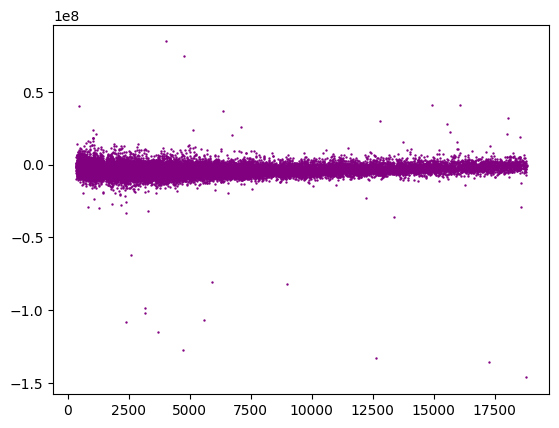


Test Set Metrics:
Mean Absolute Error: 4304183.5133984815
Mean Squared Error: 82123936426970.7
R-squared Score: -5387976.830364217


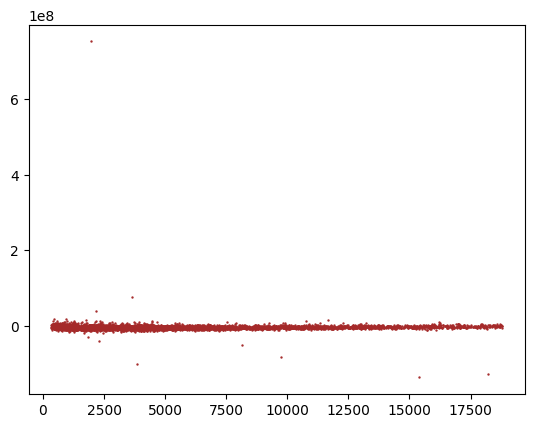

In [9]:
scores = cross_val_score(SGDRegressor(), X, y, cv = 10)

print(scores)

# parameters = {
# }
regr = SGDRegressor(random_state=42)
# clf = GridSearchCV(
#   regr,
#   parameters,
#   n_jobs = 4,
#   verbose=True
# )
clf = regr

print("Start")
clf.fit(X_train_encoded, y_train)
print("Trained")
# print(clf.best_params_)
# clf = clf.best_estimator_
dump(clf, 'model_sgd_regressor.pkl')

y_train_pred = clf.predict(X_train_encoded)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print("\nTraining Set Metrics:")
print("Mean Absolute Error:", train_mae)
print("Mean Squared Error:", train_mse)
print("R-squared Score:", train_r2)
plt.scatter(y_train, y_train_pred, s=0.5, c='purple')
plt.show()

y_test_pred = clf.predict(X_test_encoded)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\nTest Set Metrics:")
print("Mean Absolute Error:", test_mae)
print("Mean Squared Error:", test_mse)
print("R-squared Score:", test_r2)
plt.scatter(y_test, y_test_pred, s=0.5, c='brown')
plt.show()